## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [46]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [54]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

In [47]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['FE_H'])]
star = star[~np.isnan(star['FE_H_ERR'])]
star = star[~np.isnan(star['NI_FE'])]
star = star[~np.isnan(star['NI_FE_ERR'])]

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)&(star['GLAT']>60)
good = np.where(gd)[0]

theta= (0,1,-1,0.5)
dumb_x = np.arrange(np.min(feh), np.max(feh),0.002)
plt.scatter(feh, ofe, s=2)
plt.plot(dumb_x, theta), c ='g'
plt.show()



SyntaxError: cannot assign to function call (3105748367.py, line 18)

## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.031, 0.019
sigmoid: -0.878, 23.275, 0.073,-0.057
POLY3: -0.037, -0.078, 0.008, 0.021


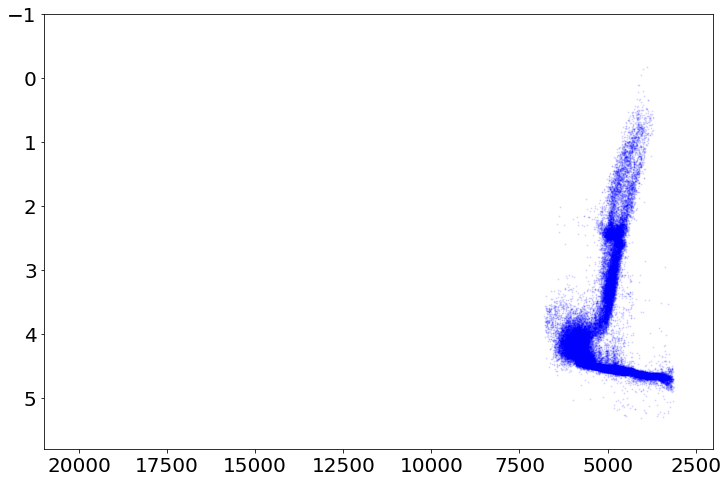

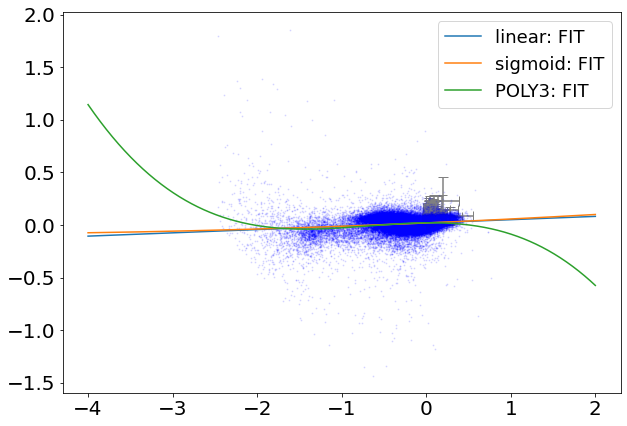

In [27]:
# write you fitting code and plot the results here
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) & (star['GLAT'] > 60)
good = np.where(gd)[0]

      
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['FE_H'])]
star = star[~np.isnan(star['FE_H_ERR'])]
star = star[~np.isnan(star['NI_FE'])]
star = star[~np.isnan(star['NI_FE_ERR'])]

## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['FE_H'][good], star['NI_FE'][good], star['FE_H_ERR'][good], \
                          star['NI_FE_ERR'][good]/1, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)
sigA, sigB, sigC, sigD= mcFit4(sigmoid, star['FE_H'][good], star['NI_FE'][good], star['FE_H_ERR'][good], \
                            star['NI_FE_ERR'][good],p0=[0,1,0.1,0])
print(f'sigmoid: {sigA:.3f}, {sigB:.3f}, {sigC:.3f},{sigD:.3f}')

## POLY3 FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(poly3, star['FE_H'][good], star['NI_FE'][good], star['FE_H_ERR'][good], \
                            star['NI_FE_ERR'][good],p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['FE_H'][good],star['NI_FE'][good],s=1,c='b',alpha=0.1)
ax1.errorbar((star['FE_H_ERR'][good]),star['NI_FE_ERR'][good], xerr=(star['FE_H_ERR'][good]),
             yerr=(star['NI_FE_ERR'][good]), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-4,2,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC ), label='sigmoid: FIT')
#poly3 fit 
ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='POLY3: FIT')
#cosfit
#ax1.plot(x_plot,cosfit(x_plot, cfA, cfB, cfC, cfD), label='cosfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only with with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [110]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['TEFF'])]
star = star[~np.isnan(star['TEFF_ERR'])]
star = star[~np.isnan(star['J'])] 
star = star[~np.isnan(star['K'])]
star = star[~np.isnan(star['J_ERR'])]
star = star[~np.isnan(star['K_ERR'])]
#star = star[~np.isnan(np.sqrt['J_ERR']**2 + star['K_ERR']**2)]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['GLAT'] < -10)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['TEFF'][cut1], (star['J'] - star['K'])[cut1], star['TEFF_ERR'][cut1], \
                          (np.sqrt(star['J_ERR']**2 + star['K_ERR']**2))[cut1]/1, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
poly1A, poly1B, poly1C,  = mcFit3(poly2, star['TEFF'][cut1], (star['J'] - star['K'])[cut1], star['TEFF_ERR'][cut1], \
                         (np.sqrt(star['J_ERR']**2 + star['K_ERR']**2))[cut1],p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

## POLY3 FIT (4 parameter)
#cf1A, cf1B, cf1C, cf1D = mcFit4(poly3, star['TEFF'][cut1], (star['J'] - star['K'])[cut1], star['TEFF_ERR'][cut1], \
                            #(np.sqrt(star['J_ERR']**2 + star['K_ERR']**2))[cut1],p0=[60,0.02,0,0])
#print(f'POLY3: {cf1A:.3f}, {cf1B:.3f}, {cf1C:.3f}, {cf1D:.3f}')
#LOGFIT (4 parameter)
# def logfit(x,a,b,c,d):
#     return a*np.log(b*x + c) + d
logA, logB, logC, logD = mcFit4(logfit, star['TEFF'][cut1],(star['J'] - star['K'])[cut1], 
                                        star['TEFF_ERR'][cut1],
                                        (np.sqrt(star['J_ERR']**2 + star['K_ERR']**2))[cut1],
                                        p0=[-.95,0.18,9,8])


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['TEFF'][cut1],(star['J'] - star['K'])[cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['TEFF'][cut1]), (star['J'] - star['K'])[cut1], xerr=(star['TEFF_ERR'][cut1]),
             yerr=((np.sqrt(star['J_ERR']**2 + star['K_ERR']**2))[cut1]), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-4,2,1000) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, poly1A, poly1B, poly1C ), label='poly2: FIT')
#poly3 fit 
ax1.plot(x_plot,poly3(x_plot, cf1A, cf1B, cf1C, cf1D), label='poly3: FIT')
#cosfit
#ax1.plot(x_plot,cosfit(x_plot, cfA, cfB, cfC, cfD), label='cosfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR: -0.000, 1.634
POLY2: 0.003, 0.035, 0.019


/var/folders/19/1r7j34y10f3dcz39h0yylh0m0000gn/T/ipykernel_12255/3932149318.py:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [57]:
star = star[~np.isnan(star['TEFF'])]
star = star[~np.isnan(star['TEFF_ERR'])]
star = star[~np.isnan(star['J'])] 
star = star[~np.isnan(star['K'])]
star = star[~np.isnan(star['J_ERR'])]
star = star[~np.isnan(star['K_ERR'])]
#star = star[~np.isnan(np.sqrt['J_ERR']**2 + star['K_ERR']**2)]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['GLAT'] < -10)
cut1 = np.where(ct1)[0]

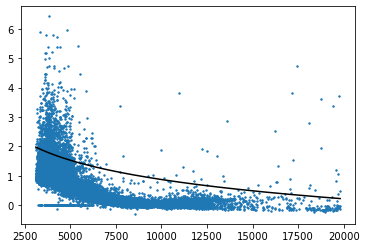

In [104]:
theta = (-.95,0.18,9,8)
star['TEFF'][cut1]
dumb_x = np.arange(np.min(star['TEFF'][cut1]),np.max(star['TEFF'][cut1]),0.02)
plt.scatter(star['TEFF'][cut1],(star['J']-star['K'])[cut1], s=2)
plt.plot(dumb_x,logfit(dumb_x, *theta), c='k')


## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [109]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['GLON'])]
star = star[~np.isnan(star['VHEILO_AVG'])]
star = star[~np.isnan(star['VERR'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < -10) | (star['GLAT'] > 10)
cut1 = np.where(ct1)[0]
#POLY3 FIT (4 parameter)
cf1A, cf1B, cf1C, cf1D = mcFit4(poly3, star['GLON'][cut1], star['VHEILO_AVG'][cut1], \
                            star['VERR'][cut1],p0=[60,0.02,0,0])
print(f'POLY3: {cf1A:.3f}, {cf1B:.3f}, {cf1C:.3f}, {cf1D:.3f}')

#LINEAR FIT 
#slope, intercept = mcFit2(linear, star['GLON'][cut1], star['VHEILO_AVG'][cut1],\
                          star['VERR'][cut1]/1, p0=[0,0])
#print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

COS FIT 
cfA, cfB, cfC, cfD = mcFit4(cosfit, star['GLON'][cut1], star['VHEILO_AVG'][cut1], star['GLON'][cut1]/1000, \
                            star['VHEILO_AVG'][cut1]/1000,p0=[60,0.02,0,0])
print(f'COSFIT: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')

KeyError: "Key 'VHEILO_AVG' does not exist."

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['NVISITS'])]
star = star[~np.isnan(star['VSCATTER'])]
star = star[~np.isnan(star['VERR'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
         (star['NVISTS'] >= 1)
cut1 = np.where(ct1)[0]
#POLY3 FIT (4 parameter)
cf1A, cf1B, cf1C, cf1D = mcFit4(poly3, star['NVISITS'][cut1], star['VSCATTER'][cut1], \
                            star['VERR'][cut1],p0=[60,0.02,0,0])
print(f'POLY3: {cf1A:.3f}, {cf1B:.3f}, {cf1C:.3f}, {cf1D:.3f}')

#LINEAR FIT 
#slope, intercept = mcFit2(linear, star['NVISITS'][cut1], star['VSCATTER'][cut1],\
                         # star['VERR'][cut1]/1, p0=[0,0])
#print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

#COS FIT 
#cfA, cfB, cfC, cfD = mcFit4(cosfit, star['NVISITS'][cut1], star['VSCATTER'][cut1], star['N'][cut1]/1000, \
#Exponential fit (5 parameter)                           # star['VHEILO_AVG'][cut1]/1000,p0=[60,0.02,0,0])
def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d
x,a,b,c,d = mcFit4(exp, star['NVISTS'][cut1], star['VSCATTER'][cut1] \
                  star['VERR'][cut1], p0=[50,0.03,1,0])

#couldn't find optimal parameters
print(f'EXPOFIT: {x:.3f}, {a:.3f}, {b:.3f}, {c:.3f}, {d:3f}')


## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
7. __Fit RA  vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['RA'])]
star = star[~np.isnan(star['GAIA_PMRA'])]
star = star[~np.isnan(star['GAIA_PMRA_ERR'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
         (star['NVISTS'] >= 1)
cut1 = np.where(ct1)[0]
#POLY3 FIT (4 parameter)
cf1A, cf1B, cf1C, cf1D = mcFit4(poly3, star['RA'][cut1], star['GAIA_PMRA'][cut1], \
                            star['GAIA_PMRA_ERR'][cut1],p0=[60,0.02,0,0])
print(f'POLY3: {cf1A:.3f}, {cf1B:.3f}, {cf1C:.3f}, {cf1D:.3f}')cf1A, cf1B, cf1C, cf1D = mcFit4(poly3, star['RA'][cut1], star['GAIA_PMRA'][cut1], \
                            star['GAIA_PMRA_ERR'][cut1],p0=[60,0.02,0,0])
print(f'POLY3: {cf1A:.3f}, {cf1B:.3f}, {cf1C:.3f}, {cf1D:.3f}')

#POLY 2 (2 parameter)
## POLY2 FIT (3 parameter)
poly1A, poly1B, poly1C,  = mcFit3(poly2, star['RA'][cut1], (star['GAIA_PMRA'])[cut1], star['RA'][cut1], \
                         (np.sqrt(star['GAIA_PMRA_ERR']**2 )[cut1],p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')


#LINEAR FIT 
slope, intercept = mcFit2(linear, star['RA'][cut1], star['GAIA_PMRA'][cut1],\
                          star['GAIA_PMRA_ERR'][cut1]/1, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['TEFF'])]
star = star[~np.isnan(star['TEFF_ERR'])]
star = star[~np.isnan(star['LOGG'])]
star = star[~np.isnan(star['LOGG_ERR'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS 
ct1 = ((np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
         (star['TEFF'] <6000 )| star['LOGG'] <3)
cut1 = np.where(ct1)[0]
## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['TEFF'][good], star['LOGG'][good], star['TEFF_ERR'][good], \
                          star['LOGG_ERR'][good]/1, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')


## POLY3 FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(poly3, star['TEFF'][good], star['LOGG'][good], star['TEFF_ERR'][good], \
                            star['LOG_ERR'][good],p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')
#POLY2 FIT 
poly1A, poly1B, poly1C,  = mcFit3(poly2, star['TEFF'][cut1], (star[['LOGG']])[cut1], star['TEFF_ERR'][cut1], \
                         (np.sqrt(star['LOGG_ERR']**2 ))[cut1],p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')



## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star = star[~np.isnan(star['GAIA_PARALLAX'])]
star = star[~np.isnan(star['GAIA_PARALLAX_ERR'])]
star = star[~np.isnan(star['GAIA_PMRA'])]
star = star[~np.isnan(star['GAIA_PMRA_ERR'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS 
ct1 = ((np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
        
cut1 = np.where(ct1)[0]
## POLY3 FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(poly3, star['GAIA_PARALLAX'][good], star['GAIA_PMRA'][good], star['GAIA_PARALLAX_ERR'][good], \
                            star['GAIA_PMRA_ERR'][good],p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')
#POLY2 FIT 
poly1A, poly1B, poly1C,  = mcFit3(poly2, star['GAIA_PARALLAX'][cut1], (star[['GAIA_PMRA']])[cut1], star['GAIA_PARALLAX_ERR'][cut1], \
                         (np.sqrt(star['GAIA_PMRA_ERR']**2 ))[cut1],p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')